In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/prices-split-adjusted.csv.zip")
df = pd.DataFrame(data)

In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [6]:
# showing column wise %ge of NaN values they contains

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)


date 	-	 0.0
symbol 	-	 0.0
open 	-	 0.0
close 	-	 0.0
low 	-	 0.0
high 	-	 0.0
volume 	-	 0.0


<Axes: >

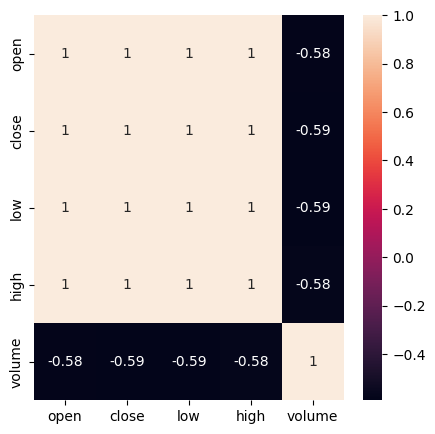

In [7]:
df = pd.read_csv("/content/prices-split-adjusted.csv.zip")
df_aapl = df[df['symbol']=='AAPL']   # Choosin stock values for any company

cormap = df_aapl.drop(columns=['date', 'symbol']).corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [8]:
def get_corelated_col(cor_dat, threshold):
  # Cor_data to be column along which corelation to be measured
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [9]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999254
close,1.000000
low,0.999657
high,0.999660


In [10]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


In [11]:
df.shape


(851264, 4)

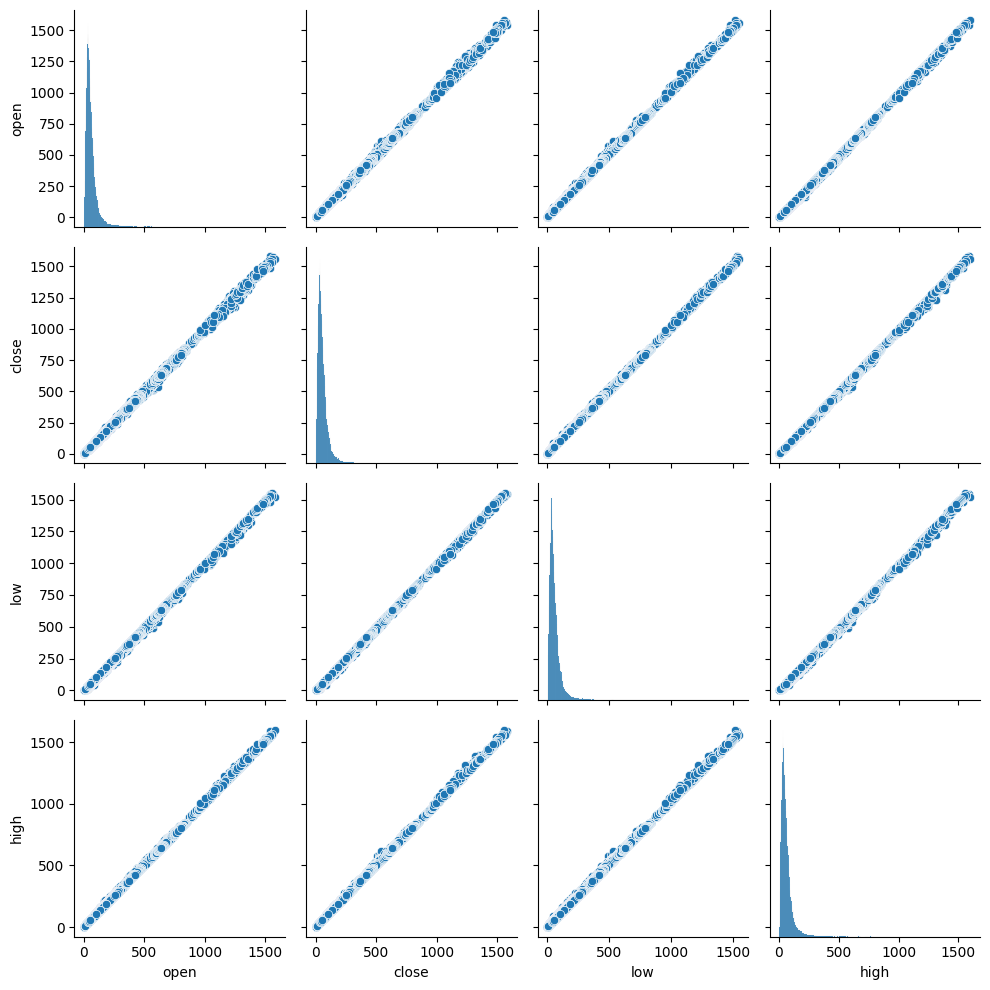

In [12]:
sns.pairplot(df)
plt.tight_layout()

In [13]:
X = df.drop(['close'], axis=1)
y = df['close']

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.076934,0.078020,0.077818
1,0.078078,0.076490,0.077374
2,0.072480,0.073254,0.073747
3,0.071911,0.072331,0.072309
4,0.072878,0.072712,0.072240


Prediction Model


In [16]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

1. Linear Regression


In [17]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [18]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
681011,97.750000,98.585524
681012,83.040001,84.471816
681013,39.750000,40.042867
681014,88.680000,89.898516
681015,42.630001,43.057401


In [19]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9999431626682372


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print('Linear Regression:')
print('MSE: ', mean_squared_error(y_test, y_pred_1))
print('MAE: ', mean_absolute_error(y_test, y_pred_1))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_1)))

Linear Regression:
MSE:  0.5979353097169057
MAE:  0.3842529296532264
RMSE:  0.7732627688676765


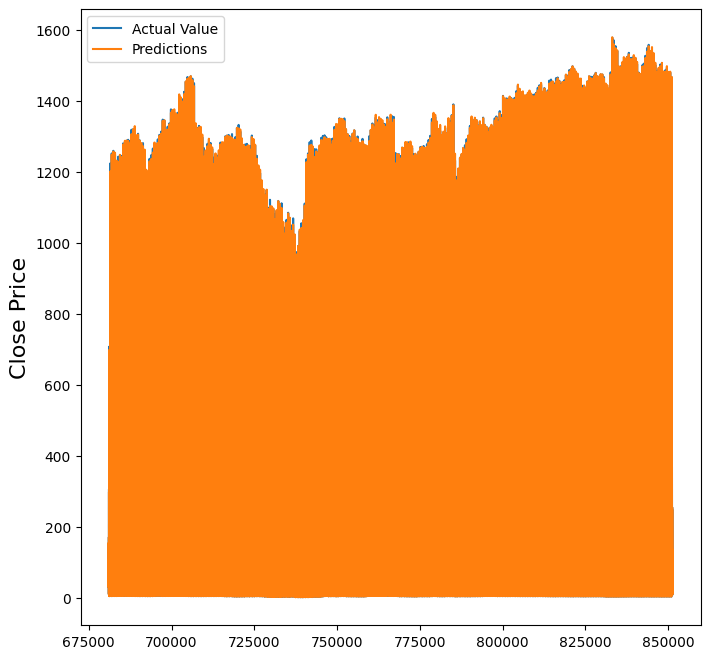

In [21]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

2. ANN


In [22]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):

    model = Sequential()

    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [23]:
# Model Training

model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=10, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 904.0033 - val_loss: 1.0928
Epoch 2/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 0.6830 - val_loss: 1.0782
Epoch 3/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 0.6717 - val_loss: 1.1328
Epoch 4/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.6701 - val_loss: 1.0906
Epoch 5/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.6349 - val_loss: 1.7033
Epoch 6/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.6488 - val_loss: 1.2949
Epoch 7/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.6534 - val_loss: 1.0033
Epoch 8/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.6450 - val_loss: 1.0169
Epoch 9/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 0.6184 - val_loss: 0.9287
Epoch 10/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 0.6094 - val_loss: 4.6119


In [24]:
# Prediction

y_pred_2 = model_2.predict(X_test)

5321/5321 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [25]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
681011,97.750000,99.159477
681012,83.040001,84.811989
681013,39.750000,41.435329
681014,88.680000,90.923225
681015,42.630001,44.671776


In [26]:

# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9993907782241135


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print('ANN:')
print('MSE: ', mean_squared_error(y_test, y_pred_2))
print('MAE: ', mean_absolute_error(y_test, y_pred_2))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_2)))

ANN:
MSE:  6.409083606725909
MAE:  1.248270123594595
RMSE:  2.5316167969749905


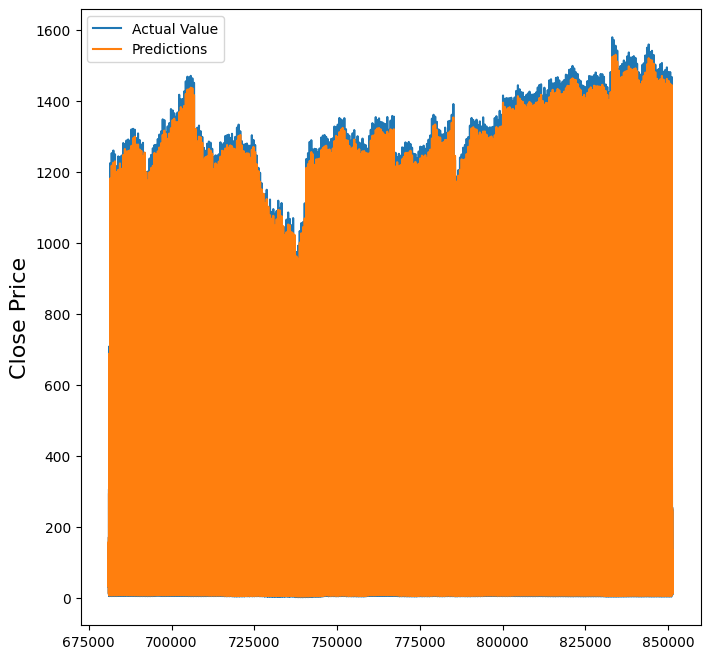

In [28]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

3. CNN


In [29]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [30]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():

    model = Sequential()

    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))

    model.add(Flatten())

    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [31]:
# Model Training

model_3 = reg()
model_3.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17026/17026 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 145.4661 - val_loss: 8.7036
Epoch 2/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - loss: 2.8087 - val_loss: 2.9670
Epoch 3/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 2.4715 - val_loss: 1.3938
Epoch 4/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 2.1353 - val_loss: 1.8224
Epoch 5/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 1.9361 - val_loss: 0.9588
Epoch 6/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 1.7049 - val_loss: 1.0753
Epoch 7/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 1.5265 - val_loss: 1.2398
Epoch 8/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - loss: 1.8752 - val_loss: 1.1155
Epoch 9/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 1.5992 - val_loss: 5.7196
Epoch 10/10
17026/17026 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 1.3984 - val_loss: 3.7424


In [32]:
# Prediction

y_pred_3 = model_3.predict(X_test)

5321/5321 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


In [33]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
681011,97.750000,99.443031
681012,83.040001,84.946945
681013,39.750000,40.169323
681014,88.680000,91.234428
681015,42.630001,43.545063


In [34]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9995500240245914


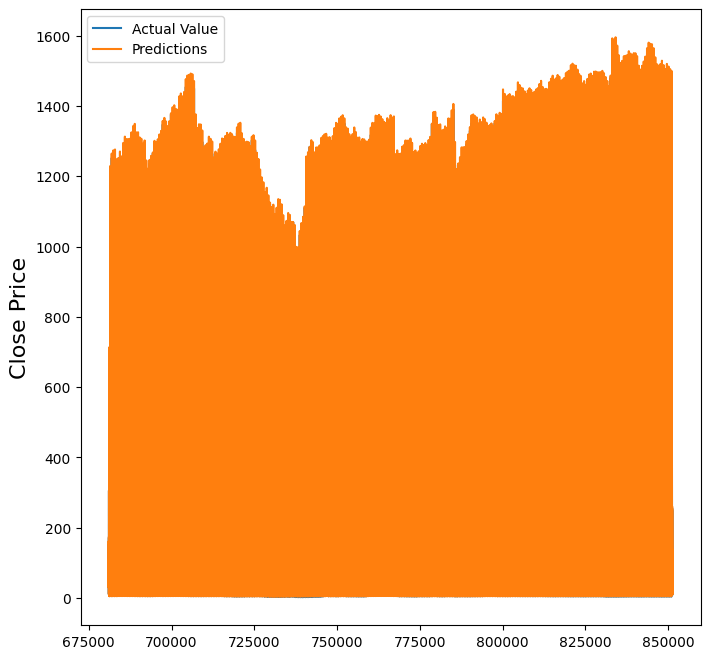

In [35]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

Comparision of Accuracies of different models


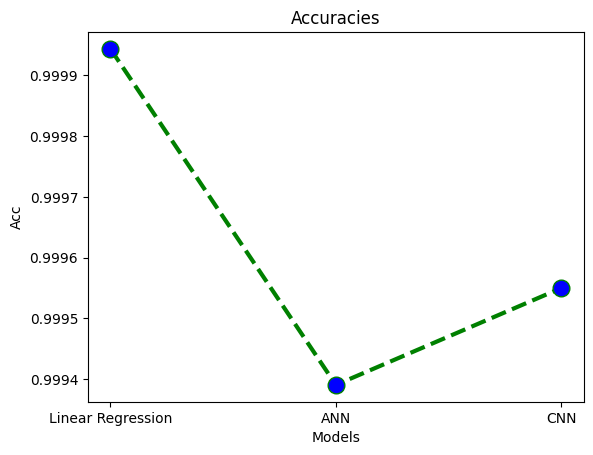

In [36]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()

Now converting data in a time series data and applying some more models.


In [37]:
close = df.reset_index()['close']
close.head()

,close
0,125.839996
1,119.980003
2,114.949997
3,116.620003
4,114.970001


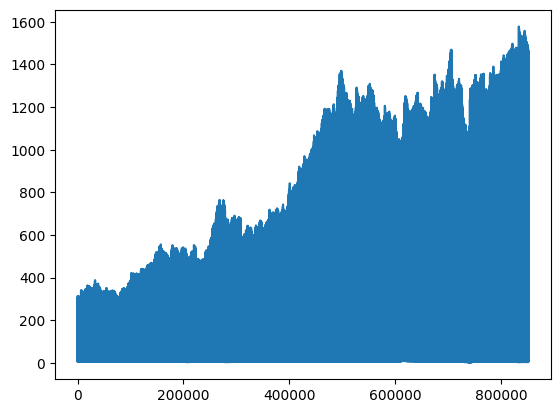

In [38]:
plt.plot(close)
plt.show()

In [39]:
time_step = 30
X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [40]:
X[:5]

array([[125.839996, 119.980003, 114.949997, 116.620003, 114.970001,
        115.550003, 112.849998, 114.379997, 112.529999, 110.379997,
        109.300003, 110.      , 111.949997, 110.120003, 111.      ,
        110.709999, 112.580002, 114.470001, 114.5     , 110.559998,
        114.050003, 115.709999, 114.019997, 111.160004, 110.650002,
        107.519997, 107.129997, 107.839996, 110.769997, 111.239998],
       [119.980003, 114.949997, 116.620003, 114.970001, 115.550003,
        112.849998, 114.379997, 112.529999, 110.379997, 109.300003,
        110.      , 111.949997, 110.120003, 111.      , 110.709999,
        112.580002, 114.470001, 114.5     , 110.559998, 114.050003,
        115.709999, 114.019997, 111.160004, 110.650002, 107.519997,
        107.129997, 107.839996, 110.769997, 111.239998, 111.599998],
       [114.949997, 116.620003, 114.970001, 115.550003, 112.849998,
        114.379997, 112.529999, 110.379997, 109.300003, 110.      ,
        111.949997, 110.120003, 111.      , 11

In [41]:
y[:5]

array([111.599998, 110.330002, 113.040001, 111.889999, 111.559998])

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.078812,0.075095,0.071904,0.072964,0.071917,0.072285,0.070572,0.071543,0.070369,0.069006,...,0.071333,0.072386,0.071314,0.069500,0.069177,0.067191,0.066944,0.067394,0.069253,0.069551
1,0.075095,0.071904,0.072964,0.071917,0.072285,0.070572,0.071543,0.070369,0.069006,0.068321,...,0.072386,0.071314,0.069500,0.069177,0.067191,0.066944,0.067394,0.069253,0.069551,0.069779
2,0.071904,0.072964,0.071917,0.072285,0.070572,0.071543,0.070369,0.069006,0.068321,0.068765,...,0.071314,0.069500,0.069177,0.067191,0.066944,0.067394,0.069253,0.069551,0.069779,0.068974
3,0.072964,0.071917,0.072285,0.070572,0.071543,0.070369,0.069006,0.068321,0.068765,0.070001,...,0.069500,0.069177,0.067191,0.066944,0.067394,0.069253,0.069551,0.069779,0.068974,0.070693
4,0.071917,0.072285,0.070572,0.071543,0.070369,0.069006,0.068321,0.068765,0.070001,0.068841,...,0.069177,0.067191,0.066944,0.067394,0.069253,0.069551,0.069779,0.068974,0.070693,0.069963


Prediction


In [43]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

1. LSTM


In [44]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [45]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()

    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [52]:
# Model Training

model_1 = reg()
model_1.fit(X_train_, y_train, epochs=80, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 1924.4100 - val_loss: 1641.9990
Epoch 2/80
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 92.6980 - val_loss: 1729.7701
Epoch 3/80
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 54.6472 - val_loss: 1559.6021
Epoch 4/80
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 41.5814 - val_loss: 1496.5011
Epoch 5/80
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 34.8491 - val_loss: 1470.1215
Epoch 6/80
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 30.1286 - val_loss: 1455.4656
Epoch 7/80
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - loss: 27.0069 - val_loss: 1395.8187
Epoch 8/80
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 26.2806 - val_loss: 1485.8444
Epoch 9/80
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 23.4514 - val_loss: 1434.8407
Epoch 10/80
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 22.5421 - val_loss: 1602.7296
Epoch 11/80
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 80

In [53]:
# Prediction

y_pred_1 = model_1.predict(X_test_)

5321/5321 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [54]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,69.690002,59.720078
1,43.520000,33.008305
2,37.000000,29.674597
3,87.019997,106.209679
4,52.099998,64.088684


In [55]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.5274556119784767


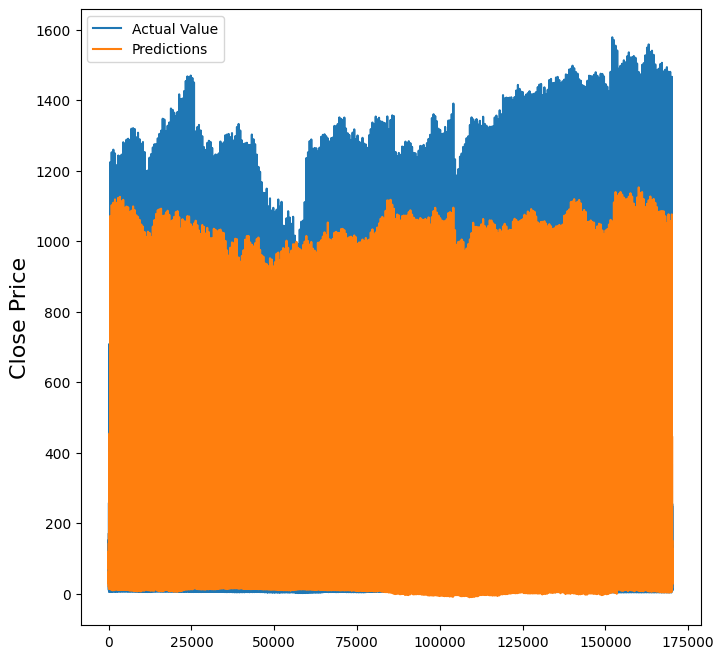

In [56]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

2. ANN


In [57]:
# Model Training

model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=10, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 3344.4033 - val_loss: 7996.5366
Epoch 2/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 3070.8145 - val_loss: 8061.7725
Epoch 3/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 2971.3669 - val_loss: 7842.4307
Epoch 4/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 2829.2036 - val_loss: 7254.0688
Epoch 5/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 2301.5742 - val_loss: 6131.7295
Epoch 6/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 1660.5867 - val_loss: 5235.8584
Epoch 7/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 1231.4249 - val_loss: 4128.9634
Epoch 8/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 952.4861 - val_loss: 3630.6838
Epoch 9/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - loss: 732.0810 - val_loss: 3292.4150
Epoch 10/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 601.2619 - val_loss: 3145.4019


In [58]:
# Prediction

y_pred_2 = model_2.predict(X_test)


5321/5321 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [59]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.23005635147077974


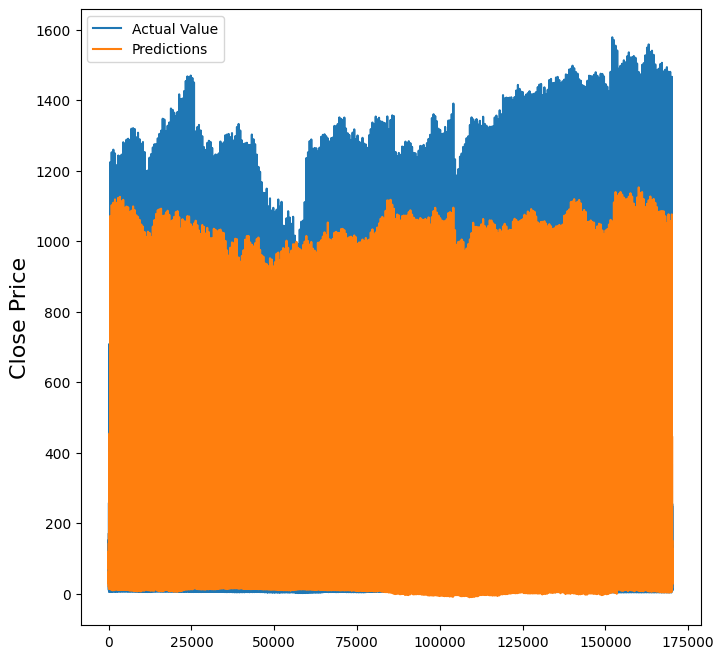

In [60]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

3. CNN

In [61]:
# Model Training

model_3 = reg()
model_3.fit(X_train_, y_train, epochs=10, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 2210.1172 - val_loss: 1821.6492
Epoch 2/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 141.0896 - val_loss: 1688.6202
Epoch 3/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 76.3228 - val_loss: 1713.1656
Epoch 4/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 52.8272 - val_loss: 1690.8947
Epoch 5/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 45.5748 - val_loss: 1687.6240
Epoch 6/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 37.6556 - val_loss: 1658.0986
Epoch 7/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 32.5497 - val_loss: 1728.5297
Epoch 8/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 33.2081 - val_loss: 1610.1819
Epoch 9/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 29.5131 - val_loss: 1647.4622
Epoch 10/10
17025/17025 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 25.5034 - val_loss: 1636.4388


In [62]:
# Prediction

y_pred_3 = model_3.predict(X_test_)

5321/5321 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [63]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,69.690002,62.635201
1,43.520000,44.440868
2,37.000000,64.092339
3,87.019997,105.357758
4,52.099998,81.196793


In [64]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.5207619315538687


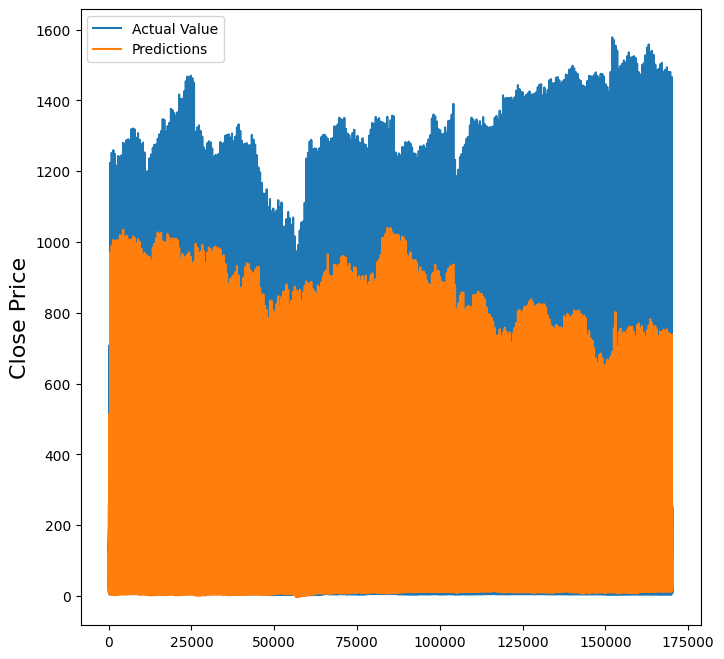

In [65]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

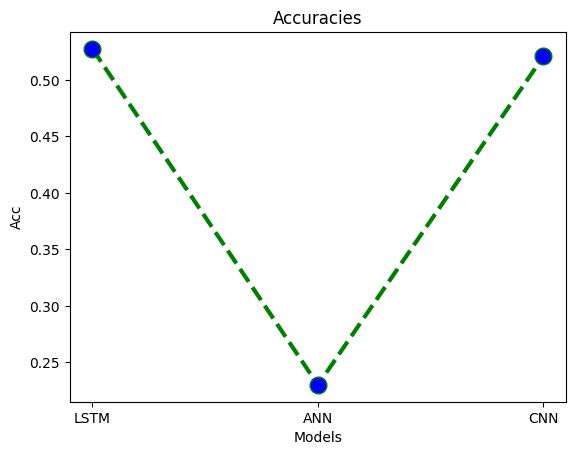

In [67]:
plt.plot(range(3), Acc[-3:], color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'ANN', 'CNN'])
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print('LSTM:')
print('MSE: ', mean_squared_error(y_test, y_pred_1))
print('MAE: ', mean_absolute_error(y_test, y_pred_1))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_1)))
print('\\n')

print('ANN:')
print('MSE: ', mean_squared_error(y_test, y_pred_2))
print('MAE: ', mean_absolute_error(y_test, y_pred_2))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_2)))
print('\\n')

print('CNN:')
print('MSE: ', mean_squared_error(y_test, y_pred_3))
print('MAE: ', mean_absolute_error(y_test, y_pred_3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_3)))

LSTM:
MSE:  4971.383373943876
MAE:  37.56164220859976
RMSE:  70.50803765489347
\n
ANN:
MSE:  8100.1597949302295
MAE:  49.3114148974292
RMSE:  90.0008877452341
\n
CNN:
MSE:  5041.803957526965
MAE:  39.72378483757876
RMSE:  71.00566144700691
